# Inntro Audio e cenas


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import  wavfile

In [58]:
file = "practice.wav"
fs, data = wavfile.read(file)

In [59]:
from IPython.display import Audio, display
Audio(data, rate = fs)

In [60]:
d1 = 4 #m
d2 = 3
c = 344 #m/s
delta1 = d1/c
delta2 = 2*np.sqrt((d1/2)**2 + d2**2) / c
print("Atrasos (em s) : ")
print(delta1)
print(delta2)
print("Atrasos(em número de amostras) : ")
n1 = int(delta1*fs)
n2 = int(delta2*fs)
print(n1)
print(n2)

Atrasos (em s) : 
0.011627906976744186
0.02096250741548831
Atrasos(em número de amostras) : 
558
1006


$ s(t) = s_1(t-\Delta t_1) + s_1(t-\Delta t_2) $ 

In [61]:
somRecebido1 = np.zeros_like(data)
somRecebido1[n1:] = data[:-n1]

somRecebido2 = np.zeros_like(data)
somRecebido2[n2:] = data[:-n2]

somRecebido = somRecebido1 + somRecebido2

print(somRecebido)

[    0     0     0 ... -1056 -1075 -1090]


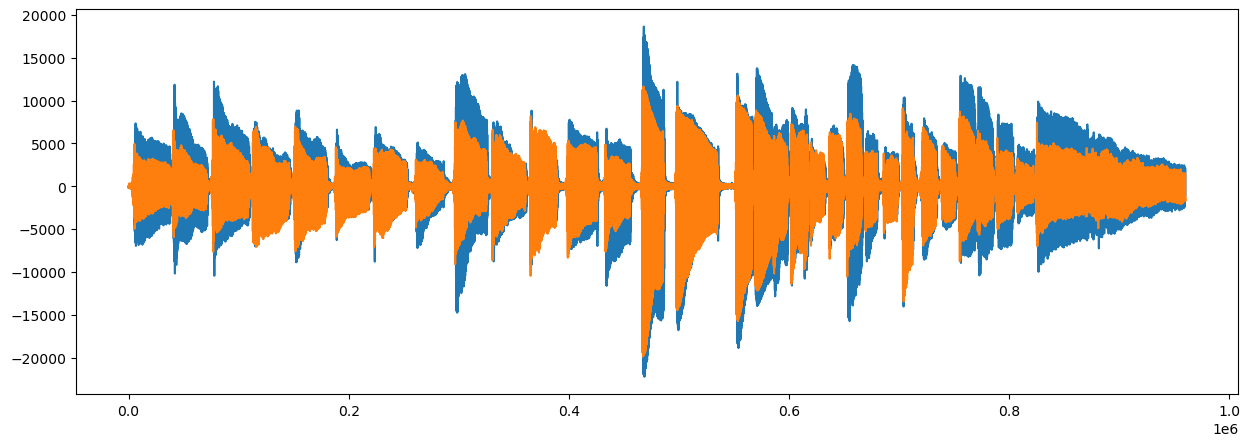

In [62]:
plt.figure(figsize=(15, 5))
plt.plot(somRecebido)
plt.plot(data)

In [63]:
"""
Outra maneira
bk = np.zeros(n2)
bk[n1] = 1
bk[n2-1] = 1
"""
bk = np.zeros(n2+1)
bk[n1] = 1
bk[n2] = 1
ak = [1, 0.9,0.9,0.8,0.9]

In [64]:
import scipy.signal as ss
y = ss.lfilter(bk,ak, data)

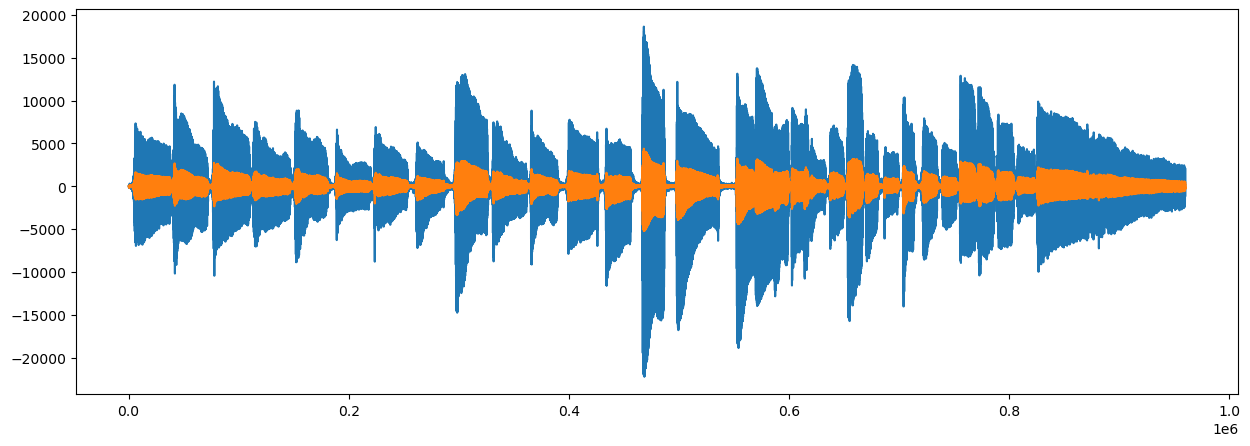

In [65]:
plt.figure(figsize=(15, 5))
plt.plot(somRecebido)
plt.plot(y)

In [66]:
somRecebido - y

array([   0.        ,    0.        ,    0.        , ..., -827.493821  ,
       -819.37331807, -823.39936623])